In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [16]:
(X_train,y_train), (X_test,y_test) = datasets.cifar10.load_data()

In [20]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

train dataset has 50,000 32x32 small images. 3 stands for rgb


test dataset has 10,000 32x32 small images. 3 stands for rgb 

In [21]:
# reshaping op of y to be 1D
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [22]:
y_test = y_test.reshape(-1,)

In [23]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

def plot_sample(X, y, index):
    plt.figure(figsize = (10,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

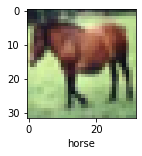

In [24]:
#now checking the dataset
plot_sample(X_train, y_train, 7)

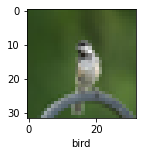

In [25]:
plot_sample(X_train, y_train, 54)

In [26]:
#normalising the data by /255 for making it in 0-1 range
X_train = X_train / 255.0
X_test = X_test / 255.0

#First trying the model with ANN and checking performance



In [27]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.8056 - accuracy: 0.3561
Epoch 2/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6194 - accuracy: 0.4276
Epoch 3/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5382 - accuracy: 0.4583
Epoch 4/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4788 - accuracy: 0.4808
Epoch 5/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4294 - accuracy: 0.4948


In [29]:
#Classification report
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.50      0.59      0.54      1000
           1       0.70      0.49      0.58      1000
           2       0.34      0.45      0.39      1000
           3       0.38      0.24      0.29      1000
           4       0.49      0.29      0.37      1000
           5       0.40      0.42      0.41      1000
           6       0.46      0.66      0.54      1000
           7       0.58      0.55      0.56      1000
           8       0.55      0.68      0.61      1000
           9       0.60      0.54      0.57      1000

    accuracy                           0.49     10000
   macro avg       0.50      0.49      0.49     10000
weighted avg       0.50      0.49      0.49     10000



#Now, Building this model with CNN

In [44]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [45]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [46]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4651 - accuracy: 0.4751
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.1259 - accuracy: 0.6048
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9942 - accuracy: 0.6527
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9119 - accuracy: 0.6824
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8453 - accuracy: 0.7064
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7917 - accuracy: 0.7232
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7469 - accuracy: 0.7409
Epoch 8/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7009 - accuracy: 0.7554
Epoch 9/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.6626 - accuracy: 0.7704
Epoch 10/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.632

In [47]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.9217 - accuracy: 0.6955


[0.9217093586921692, 0.6955000162124634]

In [48]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[9.6123409e-04, 2.6454882e-05, 6.1299419e-04, 9.6199304e-01,
        3.1457621e-05, 2.1659516e-02, 7.1379971e-03, 1.1054201e-05,
        7.5633172e-03, 2.9835630e-06],
       [2.0021634e-04, 3.1984157e-03, 9.4995158e-08, 1.5631464e-07,
        8.2689128e-10, 1.2483579e-09, 6.8724898e-10, 1.5320878e-11,
        9.9657393e-01, 2.7207760e-05],
       [1.3627925e-02, 1.8715374e-01, 1.5508194e-04, 7.4346932e-03,
        4.0995004e-05, 9.2857292e-05, 3.0781666e-04, 1.0032323e-04,
        7.7990669e-01, 1.1179860e-02],
       [9.7074080e-01, 3.2423943e-04, 1.7953968e-03, 8.2872924e-04,
        3.3897417e-05, 4.2093427e-05, 7.2278832e-05, 7.7108525e-06,
        2.6115693e-02, 3.9148301e-05],
       [1.3326273e-05, 2.4503430e-05, 3.5848869e-03, 9.8099103e-03,
        8.4480470e-01, 1.2792120e-03, 1.4047942e-01, 1.6311965e-06,
        1.3199303e-06, 1.2208758e-06]], dtype=float32)

In [54]:
y_classes = [np.argmax(element) for element in y_pred]

print('Predicted values',y_classes[:5])

Predicted values [3, 8, 8, 0, 4]


In [55]:
print('Actual values',y_test[:5])


Actual values [3 8 8 0 6]


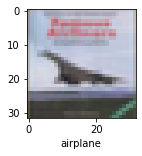

In [53]:
plot_sample(X_test, y_test,3)